__This is used when the distribution of data is skewed__

## 📌 IQR Method for Outlier Detection

The **IQR (Interquartile Range) method** is a robust technique used to detect outliers,
especially when the data is **skewed** or **not normally distributed**.

---

### 🔹 What is IQR?
- IQR measures the **spread of the middle 50% of the data**.
- It is based on **percentiles**, not mean, so it is **resistant to extreme values**.

Formula:
IQR = Q3 − Q1

Where:
- Q1 = 25th percentile
- Q3 = 75th percentile

---

### 🔹 Outlier Detection Rules
A data point `x` is considered an outlier if:

Lower Bound:
x < Q1 − 1.5 × IQR

Upper Bound:
x > Q3 + 1.5 × IQR

---

### 🔹 Types of Outliers
- **Mild outliers**: outside 1.5 × IQR
- **Extreme outliers**: outside 3 × IQR

---

### 🔹 Why Use IQR?
- Works well for **skewed distributions**
- Not affected by extreme values
- Commonly used in **boxplots**
- More reliable than Z-score when data is not normal

---

### 🔹 IQR vs Z-Score
- IQR → percentile-based → skewed data
- Z-score → mean-based → normal data

---

### 🔹 Simple Example
Given:
Q1 = 10  
Q3 = 30  

IQR = 30 − 10 = 20  

Lower Bound = 10 − 1.5×20 = −20  
Upper Bound = 30 + 1.5×20 = 60  

Any value < −20 or > 60 is an **outlier**.

---

### 🔹 When to Use IQR Method
- Data is **skewed**
- Dataset contains extreme values
- Median is preferred over mean
- Boxplot analysis is used

---

### 🔹 Advantages
- Robust and simple
- No distribution assumption
- Easy to visualize

---

### 🔹 Limitations
- May flag valid extreme values
- Less effective for very small datasets

---

### 🎯 One-Line Exam Answer
The IQR method detects outliers using percentile-based boundaries defined by Q1 − 1.5×IQR and Q3 + 1.5×IQR, making it suitable for skewed data.


```text
Outliers   LowerFence     Q1      Median      Q3     UpperFence   Outliers
   •           |           |========|========|           |           •

               |-----------|========|========|-----------|
                           <-----------  IQR  ----------->
```


Where:
- Q1 (25th percentile)
- Q3 (75th percentile)
- IQR = Q3 − Q1

Outliers:
- Values < (Q1 − 1.5 × IQR)
- Values > (Q3 + 1.5 × IQR)

| Component | Description |
|---------|-------------|
| Q1 | 25th percentile |
| Q2 | Median (50th percentile) |
| Q3 | 75th percentile |
| IQR | Q3 − Q1 |
| Lower Fence | Q1 − 1.5 × IQR |
| Upper Fence | Q3 + 1.5 × IQR |


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\placement.csv')

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

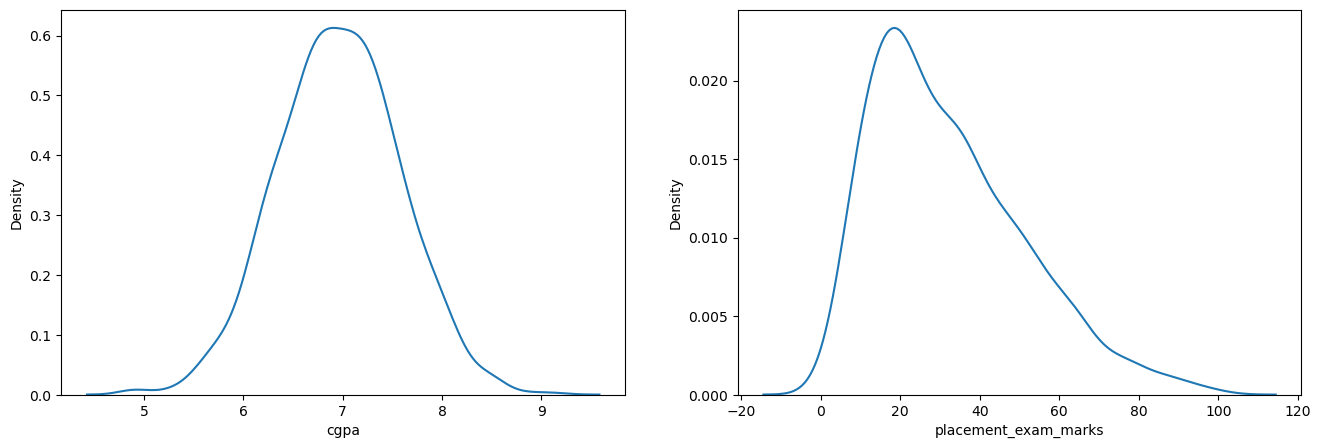

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

In [6]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [7]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

{'whiskers': [<matplotlib.lines.Line2D at 0x179861a5f90>,
 'caps': [<matplotlib.lines.Line2D at 0x179861a6210>,
 'boxes': [<matplotlib.lines.Line2D at 0x179861a5e50>],
 'medians': [<matplotlib.lines.Line2D at 0x179861a6490>],
 'fliers': [<matplotlib.lines.Line2D at 0x179861a65d0>],
 'means': []}

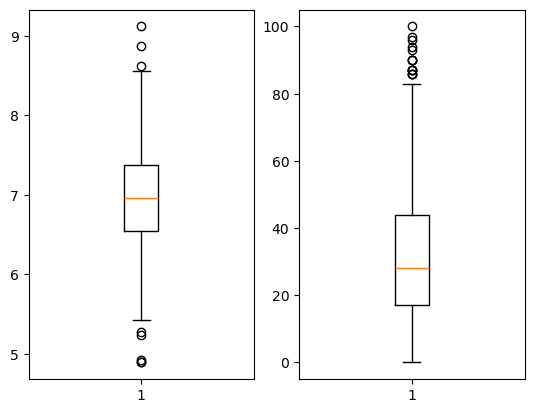

In [8]:
plt.subplot(1,2,1)
plt.boxplot(df['cgpa'])
plt.subplot(1,2,2)
plt.boxplot(df['placement_exam_marks'])

__There are two outliers in this data__
- means that are 
- Values < (Q1 − 1.5 × IQR)
- Values > (Q3 + 1.5 × IQR)

In [9]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [10]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

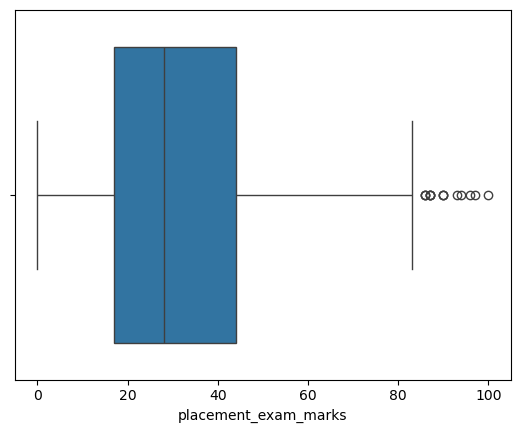

In [11]:
sns.boxplot(x=df['placement_exam_marks'])

In [12]:
# Finding the IQR

pr25 = df['placement_exam_marks'].quantile(0.25)
pr75 = df['placement_exam_marks'].quantile(0.75)

In [13]:
pr25

np.float64(17.0)

In [14]:
pr75

np.float64(44.0)

In [15]:
iqr = pr75-pr25
print(iqr)

27.0


In [16]:
up_li = pr75 + 1.5*iqr
lo_li = pr25 - 1.5*iqr

In [17]:
print('Upper limit',up_li)
print('lower limit',lo_li)

Upper limit 84.5
lower limit -23.5


__Finding Outliers__

In [18]:
df[df['placement_exam_marks']>up_li]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [19]:
df[df['placement_exam_marks']<lo_li]

,cgpa,placement_exam_marks,placed


__Trimig__

In [20]:
new_df = df[df['placement_exam_marks']<up_li]

In [21]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks'>

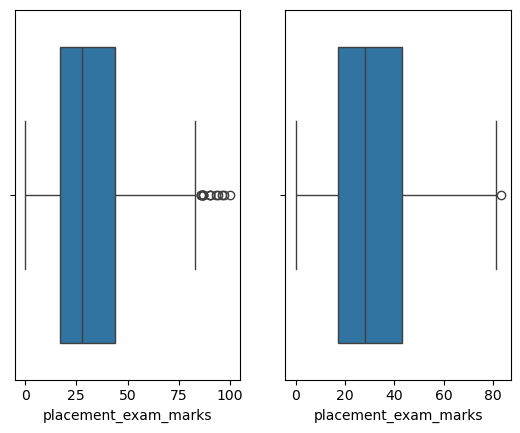

In [22]:
plt.subplot(1,2,1)
sns.boxplot(x=df['placement_exam_marks'])
plt.subplot(1,2,2)
sns.boxplot(x=new_df['placement_exam_marks'])

__Capping__

In [23]:
# new_dff = df.copy()

df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>up_li,
    up_li,
    np.where(
        df['placement_exam_marks']<lo_li,
        lo_li,
        df['placement_exam_marks']
    )
)

In [24]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [25]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks'>

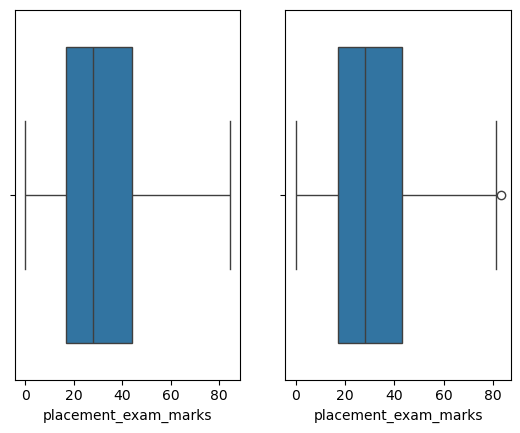

In [27]:
plt.subplot(1,2,1)
sns.boxplot(x=df['placement_exam_marks'])
plt.subplot(1,2,2)
sns.boxplot(x=new_df['placement_exam_marks'])